In [2]:
import json
import numpy as np
import rich

In [4]:
with open('taskeval_1757_human_dialogue_fewshot.json', 'r') as f:
    human_few_shot = json.load(f)

with open('taskeval_1757_actual_movement_fewshot.json', 'r') as f:
    actual_few_shot = json.load(f)
    
with open('taskeval_1757_llama_fewshot.json', 'r') as f:
    llama_few_shot_whole = json.load(f)
    
with open("taskeval_1757_llama_fewshot_end_turns_6.json", 'r') as f:
    llama_few_shot_turns_6 = json.load(f)
    
with open("taskeval_1757_llama_fewshot_end_turns_8.json", 'r') as f:
    llama_few_shot_turns_8 = json.load(f)
    
with open("taskeval_1757_llama_fewshot_end_turns_10.json", 'r') as f:
    llama_few_shot_turns_10 = json.load(f)
    
with open("taskeval_1757_llama_fewshot_end_turns_12.json", 'r') as f:
    llama_few_shot_turns_12 = json.load(f)
    
countries_list = ['Austria', 'England', 'France', 'Germany', 'Italy', 'Russia', 'Turkey']

In [4]:
# for i in llama_few_shot:
#     for j in llama_without_previous:
#         if i['game_id'] == j['game_id'] and i['phase_name'] == j['phase_name']:
#             rich.print(f"With Previous Dialogue: {i['game_id'] + ' ' + i['phase_name']}")
#             rich.print(i['intent_dialogue'])
#             rich.print(f"Without Previous Dialogue: {i['game_id'] + ' ' + i['phase_name']}")
#             rich.print(j['intent_dialogue'])
#             break

In [5]:
# rich.print(llama_with_previous[0])

In [6]:
len(human_few_shot), len(actual_few_shot), len(llama_few_shot)

(1757, 1757, 153)

In [5]:
def get_score_with_env(countries, prediction):
    scores = 0
    for c in countries:
        scores += prediction[c][c.upper()][1]
    score_dict = {}
    score_dict['env'] = prediction['env_uuid']
    score_dict['scores'] = scores / len(countries)
    return score_dict

def get_score_dict_from_dialogue(dialogue):
    score_list = []
    for a in dialogue:
        keys = []
        for vkeys in a.keys():
            if vkeys in countries_list:
                keys.append(vkeys)
        score_list.append(get_score_with_env(keys, a))
    return score_list

In [6]:
human_few_shot_score_dict = get_score_dict_from_dialogue(human_few_shot)
actual_few_shot_score_dict = get_score_dict_from_dialogue(actual_few_shot)
llama_few_shot_score_dict = get_score_dict_from_dialogue(llama_few_shot_whole)
llama_few_shot_turns_6_score_dict = get_score_dict_from_dialogue(llama_few_shot_turns_6)
llama_few_shot_turns_8_score_dict = get_score_dict_from_dialogue(llama_few_shot_turns_8)
llama_few_shot_turns_10_score_dict = get_score_dict_from_dialogue(llama_few_shot_turns_10)
llama_few_shot_turns_12_score_dict = get_score_dict_from_dialogue(llama_few_shot_turns_12)

# actual_dialogue_score_dict[0]

In [26]:
few_shot_whole_mean = np.mean([i['scores'] for i in llama_few_shot_score_dict]).round(4)
few_shot_6_mean = np.mean([i['scores'] for i in llama_few_shot_turns_6_score_dict]).round(4)
few_shot_8_mean = np.mean([i['scores'] for i in llama_few_shot_turns_8_score_dict]).round(4)
few_shot_10_mean = np.mean([i['scores'] for i in llama_few_shot_turns_10_score_dict]).round(4)
few_shot_12_mean = np.mean([i['scores'] for i in llama_few_shot_turns_12_score_dict]).round(4)

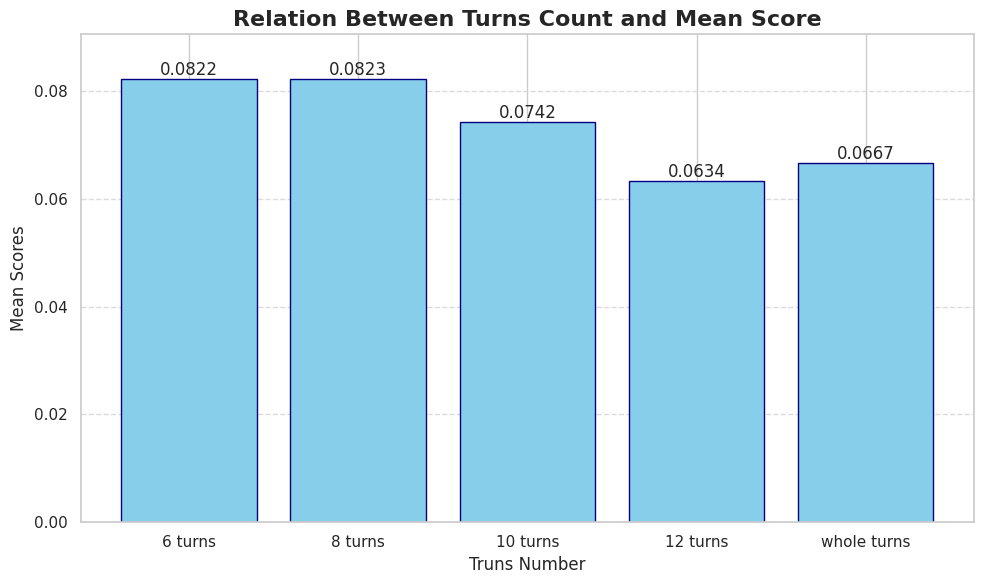

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
categories = ['6 turns', '8 turns', '10 turns', '12 turns', 'whole turns']
values = [few_shot_6_mean, few_shot_8_mean, few_shot_10_mean, few_shot_12_mean, few_shot_whole_mean]

# 创建条形图
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color='skyblue', edgecolor='navy')

# 添加标题和轴标签
plt.title('Relation Between Turns Count and Mean Score', fontsize=16, fontweight='bold')
plt.xlabel('Truns Number', fontsize=12)
plt.ylabel('Mean Scores', fontsize=12)

# 在每个条形上方添加数值标签
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

# 自定义y轴范围，使图表更美观
plt.ylim(0, max(values) * 1.1)

# 添加网格线以提高可读性
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

In [7]:
def sub_score(score_list_1, score_list_2):
    model_score_dict = {item['env']: item['scores'] for item in score_list_2}
    results = []
    for item in score_list_1:
        env = item['env']
        score1 = item['scores']
        score2 = model_score_dict.get(env)
        if score2 == None:
            continue
        results.append({"env": item['env'], "scores": score1 - score2})
        results.append(env)
    return results


In [8]:
sub_score(human_few_shot_score_dict, actual_few_shot_score_dict)

[{'env': '01J7FDPQYHDATHNDQDC8DK3RA4', 'scores': 0.0015393991488963366},
 '01J7FDPQYHDATHNDQDC8DK3RA4',
 {'env': '01J7FDPPE7G1ZYMQX5JR58C0GA', 'scores': 0.0},
 '01J7FDPPE7G1ZYMQX5JR58C0GA',
 {'env': '01J7FDPT41K1Q4DWY6JJKA6VW8', 'scores': 0.0},
 '01J7FDPT41K1Q4DWY6JJKA6VW8',
 {'env': '01J7FDPS2PYERZDER3ZF59PTJM', 'scores': -0.018861363641917706},
 '01J7FDPS2PYERZDER3ZF59PTJM',
 {'env': '01J7FDPPMQ0PHD29CCJ3VETFEM', 'scores': -0.004343286156654358},
 '01J7FDPPMQ0PHD29CCJ3VETFEM',
 {'env': '01J7FDPPMY1WNJTZT0R3MZ7967', 'scores': 0.017130136489868164},
 '01J7FDPPMY1WNJTZT0R3MZ7967',
 {'env': '01J7FDPR0AG52WBA6DBJ1QG586', 'scores': -0.008171645924448967},
 '01J7FDPR0AG52WBA6DBJ1QG586',
 {'env': '01J7FDPPEB2Z6ARTQV8FM5TY12', 'scores': -0.018792614340782166},
 '01J7FDPPEB2Z6ARTQV8FM5TY12',
 {'env': '01J7FDPRWMKS0EEFKCZNJ72HH4', 'scores': 0.0},
 '01J7FDPRWMKS0EEFKCZNJ72HH4',
 {'env': '01J7FDPTDTD9TVEST7DAR0HGY1', 'scores': 0.0},
 '01J7FDPTDTD9TVEST7DAR0HGY1',
 {'env': '01J7FDPPKD8T7K0T9JA2V0S

/tmp/ipykernel_785168/3567511572.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data1, shade=True, color='skyblue', alpha=0.7, linewidth=2, label='Human Dialogue Results')
/tmp/ipykernel_785168/3567511572.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data2, shade=True, color='green', alpha=0.7, linewidth=2, label='Actual Movement Results')


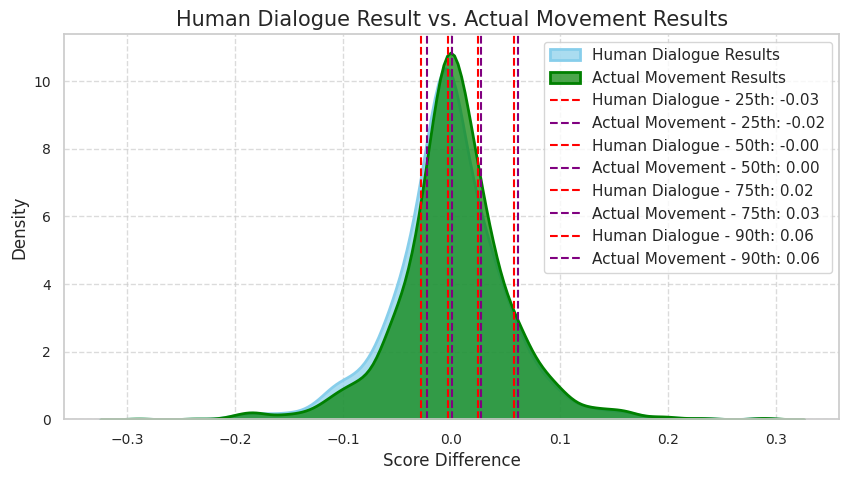

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# TODO: add comparison between human and actual movement
# data1 = [d['scores'] for d in human_few_shot_score_dict if d['scores'] >= 0.06]
data1 = [d['scores'] for d in human_few_shot_score_dict]
data2 = [d['scores'] for d in actual_few_shot_score_dict]

sns.set(style="whitegrid")

# 密度图
plt.figure(figsize=(10, 5))
sns.kdeplot(data1, shade=True, color='skyblue', alpha=0.7, linewidth=2, label='Human Dialogue Results')
sns.kdeplot(data2, shade=True, color='green', alpha=0.7, linewidth=2, label='Actual Movement Results')

# 计算并标记分位点
percentiles = [25, 50, 75, 90]
for percentile in percentiles:
    score1 = np.percentile(data1, percentile)
    plt.axvline(x=score1, color='red', linestyle='--', label=f'Human Dialogue - {percentile}th: {score1:.2f}')
    score2 = np.percentile(data2, percentile)
    plt.axvline(x=score2, color='purple', linestyle='--', label=f'Actual Movement - {percentile}th: {score2:.2f}')

plt.title('Human Dialogue Result vs. Actual Movement Results', fontsize=15)
plt.xlabel('Score Difference', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


/tmp/ipykernel_785168/1395089630.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data1, shade=True, color='skyblue', alpha=0.7, linewidth=2, label='Human Dialogue Results')
/tmp/ipykernel_785168/1395089630.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data2, shade=True, color='green', alpha=0.7, linewidth=2, label='llama3 Fewshot Results')


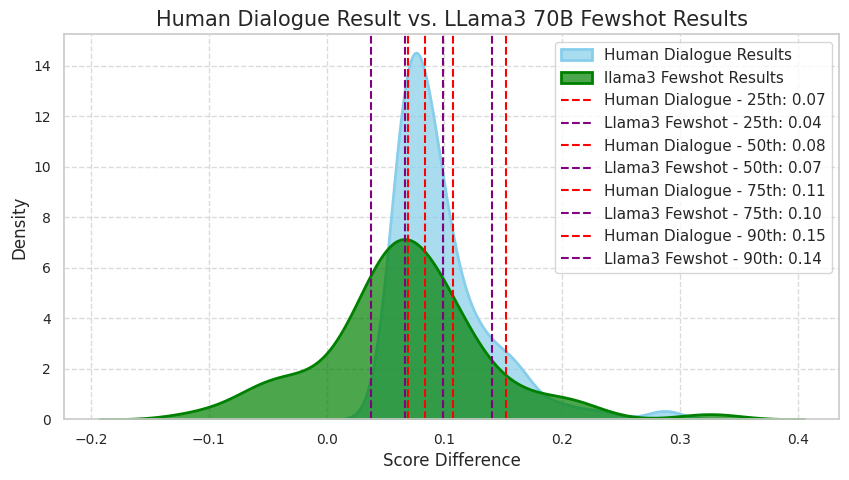

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# TODO: add comparison between human and actual movement
data1 = [d['scores'] for d in human_few_shot_score_dict if d['scores'] >= 0.06]
# data2 = [d['scores'] for d in actual_few_shot_score_dict]
data2 = [d['scores'] for d in llama_few_shot_score_dict]

sns.set(style="whitegrid")

# 密度图
plt.figure(figsize=(10, 5))
sns.kdeplot(data1, shade=True, color='skyblue', alpha=0.7, linewidth=2, label='Human Dialogue Results')
sns.kdeplot(data2, shade=True, color='green', alpha=0.7, linewidth=2, label='llama3 Fewshot Results')

# 计算并标记分位点
percentiles = [25, 50, 75, 90]
for percentile in percentiles:
    score1 = np.percentile(data1, percentile)
    plt.axvline(x=score1, color='red', linestyle='--', label=f'Human Dialogue - {percentile}th: {score1:.2f}')
    score2 = np.percentile(data2, percentile)
    plt.axvline(x=score2, color='purple', linestyle='--', label=f'Llama3 Fewshot - {percentile}th: {score2:.2f}')

plt.title('Human Dialogue Result vs. LLama3 70B Fewshot Results', fontsize=15)
plt.xlabel('Score Difference', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


/tmp/ipykernel_81152/544889489.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data1, shade=True, color='skyblue', alpha=0.7, linewidth=2, label='Llama3 Fewshot Results (6 turns)')
/tmp/ipykernel_81152/544889489.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data2, shade=True, color='green', alpha=0.7, linewidth=2, label='llama3 Fewshot Results full turns')


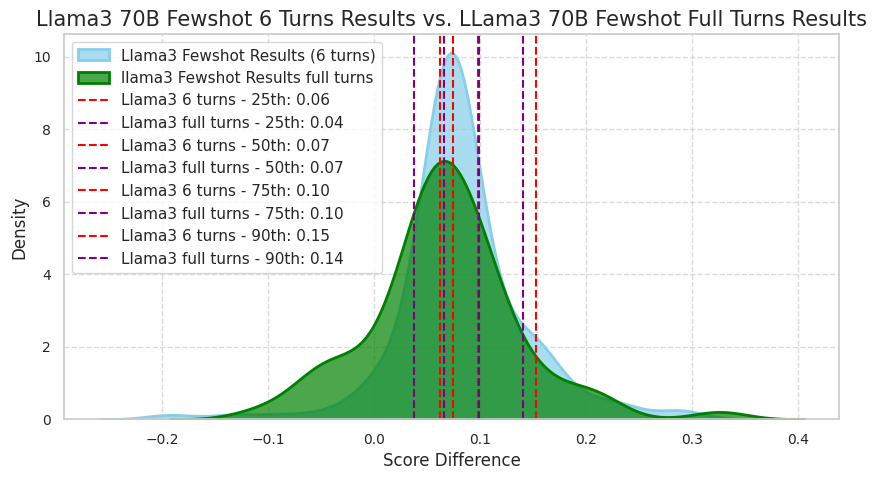

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# TODO: add comparison between human and actual movement
data1 = [d['scores'] for d in llama_few_shot_turns_6_score_dict]
# data2 = [d['scores'] for d in actual_few_shot_score_dict]
data2 = [d['scores'] for d in llama_few_shot_score_dict]

sns.set(style="whitegrid")

# 密度图
plt.figure(figsize=(10, 5))
sns.kdeplot(data1, shade=True, color='skyblue', alpha=0.7, linewidth=2, label='Llama3 Fewshot Results (6 turns)')
sns.kdeplot(data2, shade=True, color='green', alpha=0.7, linewidth=2, label='llama3 Fewshot Results full turns')

# 计算并标记分位点
percentiles = [25, 50, 75, 90]
for percentile in percentiles:
    score1 = np.percentile(data1, percentile)
    plt.axvline(x=score1, color='red', linestyle='--', label=f'Llama3 6 turns - {percentile}th: {score1:.2f}')
    score2 = np.percentile(data2, percentile)
    plt.axvline(x=score2, color='purple', linestyle='--', label=f'Llama3 full turns - {percentile}th: {score2:.2f}')

plt.title('Llama3 70B Fewshot 6 Turns Results vs. LLama3 70B Fewshot Full Turns Results', fontsize=15)
plt.xlabel('Score Difference', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


In [37]:
def list_choice(score_list_1, score_list_2):
    model_score_dict = {item['env']: item['scores'] for item in score_list_2}
    results = []
    for item in score_list_1:
        env = item['env']
        score1 = item['scores']
        score2 = model_score_dict.get(env)
        if score2 == None:
            continue
        if score1 >= 0.06 and score2 >= 0.06:
            results.append(env)
    return results


In [38]:
result = list_choice(human_few_shot_score_dict, actual_few_shot_score_dict)
len(result)

153

In [39]:
result

['01J7FDPS2PYERZDER3ZF59PTJM',
 '01J7FDPPFFRKE7ZWPTA42TPV8M',
 '01J7FDPT014YS7712NZ70R145X',
 '01J7FDPS22ECDCZTRA24C9QXZ4',
 '01J7FDPQFWW2D5E3V4ZW8FC4D9',
 '01J7FDPS4JF65SVY1A0N1FEX8J',
 '01J7FDPQ55FZC5QNCVPPG6ADC6',
 '01J7FDPPRMK2N6JWH3HGQECGWE',
 '01J7FDPS1WF1YFYRTW6QR1C757',
 '01J7FDPSFKJG89HX4BYC5H33PR',
 '01J7FDPSYEF3BAVBH9Y6ZVAMHN',
 '01J7FDPRMM1JN91SNP053E3PAK',
 '01J7FDPRHNEVMRM4MAXYX6GTP0',
 '01J7FDPTPEY314883MP21HKZSQ',
 '01J7FDPPMPJJNS4RTRG15N03M2',
 '01J7FDPPSC4YHXGFHVFNG2V7EM',
 '01J7FDPS1QX1ZVP6CWAZG3FM04',
 '01J7FDPPEJ8BG86YTVKR7PK5W3',
 '01J7FDPPKMREG7JZBEYCXXW1A6',
 '01J7FDPPGGS2Q5JJ58BJXC7W5R',
 '01J7FDPTPA8EVRXKQHX5PHDHKS',
 '01J7FDPRXE0JB8H1YM30A4KG5T',
 '01J7FDPS124G61PK6QXD2EMSTN',
 '01J7FDPTF8PG4SYSNJYZV3DRA8',
 '01J7FDPSCY9C4NXMNZJ8A202PT',
 '01J7FDPQJHKXV1FZNPPAZCG26H',
 '01J7FDPQFPEDDWB747G6X0XHZP',
 '01J7FDPTP8AQBXA62N38G2V9ZE',
 '01J7FDPRZFDH5DBR6V36AZ6T06',
 '01J7FDPSNQJM4RBQNYAZC95JMB',
 '01J7FDPR6981GRF306PZJMG13T',
 '01J7FDPS107XHF7D8VNMG5Z8KX',
 '01J7FD

In [7]:
# import random
# random.sample(llama3_movement_score_dict, 2)
for i in actual_dialogue_score_dict:
    if i['scores'] >= 0.1:
        print(i)

{'env': '01J60BT5XY0Q2M5SYWFJM5HX1M', 'scores': 0.1119929738342762}
{'env': '01J60BT76JXEP7T3XSTBQPJ4JS', 'scores': 0.21978647261857986}
{'env': '01J60BT6X04M91SN6P923AAZQ8', 'scores': 0.10206570941954851}
{'env': '01J60BT4R24K9F5X9CH0S2K75E', 'scores': 0.11611892282962799}
{'env': '01J60BT374M0D0V7ND8MRW3G2V', 'scores': 0.25924815982580185}
{'env': '01J60BT6FM959V292SPHC5YP0W', 'scores': 0.13478761608712375}
{'env': '01J60BT37B0ZEWCFQG90Q4EECE', 'scores': 0.10962003469467163}
{'env': '01J60BT5MFCZN7T748QXZ008SG', 'scores': 0.10748082399368286}
{'env': '01J60BT50KYZAHGN06N712JMWE', 'scores': 0.10189205780625343}
{'env': '01J60BT6FJQQ9Q3QSVE400MZSN', 'scores': 0.12473930511623621}
{'env': '01J60BT372TYC7SJE8N0DZ0V5T', 'scores': 0.25368985952809453}
{'env': '01J60BT3Q1P8R3CC1ZA16AHEF4', 'scores': 0.12553728779312223}
{'env': '01J60BT3PZRGKC19VKNJ7533P0', 'scores': 0.125752790729166}
{'env': '01J60BT56MT3VP2NS4V8P8JNG2', 'scores': 0.184791280888021}
{'env': '01J60BT76HQ9QJ40FBTG6QR8ZS', '

In [13]:
env_list = ['01J59BS084GNA6C2HKMTR6YZXR', '01J59BRZEZM7F91EWQYG8NPYPX', '01J59BS04EFCX6BGK0C9AQH3WW','01J59BRZMX5H6G94MPRA4XF58T', '01J59BRY4F3Y8BWT31W2P24RHM','01J59BRYJKH6QPCXQSP8FPAME4']
for i in llama3_movement_score_dict:
    if i['env'] in env_list:
        print(i)

{'env': '01J59BS04EFCX6BGK0C9AQH3WW', 'scores': -0.0311471875756979}
{'env': '01J59BS084GNA6C2HKMTR6YZXR', 'scores': 0.1603778600692749}
{'env': '01J59BRZEZM7F91EWQYG8NPYPX', 'scores': 0.17182965483516455}
{'env': '01J59BRY4F3Y8BWT31W2P24RHM', 'scores': 0.07763940654695034}
{'env': '01J59BRZMX5H6G94MPRA4XF58T', 'scores': -0.04151174507569522}
{'env': '01J59BRYJKH6QPCXQSP8FPAME4', 'scores': 0.03860548697412014}


In [14]:
gpt4_movement_score_dict

[{'env': '01J59BRY4F3Y8BWT31W2P24RHM', 'scores': 0.09490234218537807},
 {'env': '01J59BRYJKH6QPCXQSP8FPAME4', 'scores': 0.03860548697412014},
 {'env': '01J59BRZMX5H6G94MPRA4XF58T', 'scores': -0.04003396152984351},
 {'env': '01J59BS084GNA6C2HKMTR6YZXR', 'scores': 0.10608309507369995},
 {'env': '01J59BRZEZM7F91EWQYG8NPYPX', 'scores': 0.22015525307506323},
 {'env': '01J59BS04EFCX6BGK0C9AQH3WW', 'scores': -0.028769112192094326},
 {'env': '01J59BS084GNA6C2HKMTR6YZXR', 'scores': 0.08333529531955719}]

In [15]:
env_list = ['01J59BS084GNA6C2HKMTR6YZXR', '01J59BRZEZM7F91EWQYG8NPYPX', '01J59BS04EFCX6BGK0C9AQH3WW','01J59BRZMX5H6G94MPRA4XF58T', '01J59BRY4F3Y8BWT31W2P24RHM','01J59BRYJKH6QPCXQSP8FPAME4']
for i in actual_dialogue_score_dict:
    if i['env'] in env_list:
        print(i)

{'env': '01J59BS04EFCX6BGK0C9AQH3WW', 'scores': 0.08043783251196146}
{'env': '01J59BRY4F3Y8BWT31W2P24RHM', 'scores': 0.10021558590233326}
{'env': '01J59BRZMX5H6G94MPRA4XF58T', 'scores': 0.06032665737438947}
{'env': '01J59BRYJKH6QPCXQSP8FPAME4', 'scores': 0.06257491372525692}
{'env': '01J59BS084GNA6C2HKMTR6YZXR', 'scores': 0.07403899729251862}
{'env': '01J59BRZEZM7F91EWQYG8NPYPX', 'scores': 0.184791280888021}


In [16]:
for i in intent_movement_llama3:
    if i['env_uuid'] == '01J59BRYJKH6QPCXQSP8FPAME4':
        print(i['intent_dialogue'])

0 AUSTRIA -> ITALY: Hello Italy, nice to play Diplomacy with you! I'm Austria, representing Austria. I'm excited to form alliances and work together to achieve our goals. What's your country, and what are your thoughts on the current board situation?
1 ITALY -> AUSTRIA: Hello Austria, nice to meet you too! I'm Italy, representing Italy. I'm also excited to form alliances and work together. I think the current board situation is quite interesting, with many possibilities. I notice that our countrieshare a border, and I believe we could mutually benefit from cooperating. Perhaps we couldiscuss ways to support each other in gaining supply centers, especially in the Mediterranean region?
2 AUSTRIA -> ITALY: I completely agree with you, Italy. Our shared border does present opportunities for cooperation. I think supporting each other in gaining supply centers in the Mediterranean region could be mutually beneficial. Specifically, I was thinking that if you were to move your army in Venice t

In [17]:
for i in intent_movement_gpt4:
    if i['env_uuid'] == '01J59BS04EFCX6BGK0C9AQH3WW':
        print(i['intent_dialogue'])

0 GERMANY -> ENGLAND: Hello England, I can see we both have a vested interest in maintaining a strong presence in Northern Europe. I've been considering how we might assist each other in securing our positions. If you're open to it, I'd like to propose a collaborative effort this turn. Perhaps we can arrange for some of our units to support each other's movements. For instance, your fleet in the North Sea could help by moving to Norway, which would be mutually beneficial. What do you think?
1 ENGLAND -> GERMANY: Hello Germany, your proposal for collaboration is intriguing. I agree that our fleets could work in tandem to strengthen our hold in Northern Europe. If your fleet in Norway supports a move from my fleet in the North Sea to Norway, it could indeed be beneficial to us both. Additionally, I'd appreciate support from your army in Denmark to assist my army in Edinburgh to move into Norway. This would help solidify our positions against any northern threats. What are your thoughts o

In [18]:
# 打开一个文件进行写入
env_list = ['01J59BS084GNA6C2HKMTR6YZXR', '01J59BRZEZM7F91EWQYG8NPYPX', '01J59BS04EFCX6BGK0C9AQH3WW','01J59BRZMX5H6G94MPRA4XF58T', '01J59BRY4F3Y8BWT31W2P24RHM','01J59BRYJKH6QPCXQSP8FPAME4']
with open('output.txt', 'w', encoding='utf-8') as file:
    for i in intent_movement_gpt4:
        if i['env_uuid'] in env_list:
            file.write(i['env_uuid'] + '\n' + i['intent_dialogue'] + '\n')  # 写入对话并添加换行符

# 这将创建一个名为 output.txt 的文件，并将符合条件的对话写入文件，每条对话后都有一个换行符


In [19]:
for i in intent_movement_llama3:
    if i['env_uuid'] == '01J59BRZEZM7F91EWQYG8NPYPX':
        print(i['intent_dialogue'])

0 AUSTRIA -> RUSSIA: Hello Russia, it's greato be playing Diplomacy with you. I'm Austria, playing as Austria. I think it's essential to have a strong alliance in thearly game. Would you like to discuss a potential partnership and howe can work together to achieve our goals?
1 RUSSIA -> AUSTRIA: Hello Austria, I'm Russia, playing as Russia. I appreciate your willingness to form an alliance. Indeed, a strong partnership can be crucial in thearly game. I'm interested in discussing howe can work together. Specifically, I think our armies can complement each other well. Perhaps we can coordinate our moves to take down a weaker power, like Turkey? What are your thoughts on this?
2 AUSTRIA -> RUSSIA: I think that's a great idea, Russia. Taking down Turkey would give us both a significant advantage in thearly game. I was thinking of moving my army in Bulgaria to support your move into Turkey. Additionally, I could move my fleet in Greece to support your naval movement into the Black Sea. What

In [20]:
for i in actual_movement:
    if i['env_uuid'] == '01J59BRZMX5H6G94MPRA4XF58T':
        print(i['intent_dialogue'])

0 AUSTRIA -> ITALY: Whoo, let's get this turn going. Not to nag, but make sure to get that support hold order in. Anything yo need me to do this turn?
1 ITALY -> AUSTRIA: Sure on support order, umm whats to be done about Bulgaria and Turkey? Am I still meant to be attacking him?
2 AUSTRIA -> ITALY: If you could bounce me at Bulgaria this turn, that would be great. You can lay into Turkey 100% next turn. Sound good?
3 ITALY -> AUSTRIA: Lol, Aye that sounds fine, you dont want Bulgaria though, just the bounce?
4 AUSTRIA -> ITALY: Yeah; I want to ensure Turkey has enough firepower to get into the Black Sea and Sevastopol, and also want to ensure that Russia doesn't get Rumania, more importantly.
After the year after this one, you should look at expanding Westwards, while I mop up Russia.
5 ITALY -> AUSTRIA: Ok, that sounds fair

